In [1]:
import sqlite3
import pandas as pd
import numpy as np
import skycoverage
import matplotlib.pyplot as plt
import json

In [2]:
from matplotlib.patches import Rectangle

def plot_layers(X,Y,image,minra,mindec,ra_width,filter_name,limits=None):
    
    result = np.where(image==np.max(image))

    plt.close('all')

    plt.figure()
    plt.grid()
    
    #X=X+360
    Z=np.ma.masked_equal(image,0)
    cmp = plt.pcolormesh(X,Y,Z)
    plt.grid()
    
    # Create a Rectangle patch   
    print(minra, mindec, ra_width)
    plt.gca().add_patch(Rectangle((ra-0.75/2.,dec-0.75/2.),0.75,0.75,
                    angle=0,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))
    
    plt.xlim(max(X), min(X))
    plt.ylim(min(Y), max(Y))
    plt.title(f'Rubin {filter_name}')
    #plt.axis('equal')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.rcParams['axes.grid'] = False
    plt.colorbar(label='# of Layers')
    plt.show()

In [3]:
# Set filepath 
baseline_filepath = '/sps/euclid/Users/jpollack/LSST/baseline_v2.0_10yrs.db'

# Create a SQL connection to our SQLite database
con = sqlite3.connect(baseline_filepath)

In [4]:
cursor = con.cursor()

In [5]:
# Using SELECT * Returns all results query
sql='''SELECT * FROM OBSERVATIONS WHERE observationId = 146041'''

In [6]:
data = pd.read_sql(sql, con)

In [7]:
data.columns

Index(['observationId', 'fieldRA', 'fieldDec', 'observationStartMJD',
       'flush_by_mjd', 'visitExposureTime', 'filter', 'rotSkyPos',
       'numExposures', 'airmass', 'seeingFwhm500', 'seeingFwhmEff',
       'seeingFwhmGeom', 'skyBrightness', 'night', 'slewTime', 'visitTime',
       'slewDistance', 'fiveSigmaDepth', 'altitude', 'azimuth', 'paraAngle',
       'cloud', 'moonAlt', 'sunAlt', 'note', 'fieldId', 'proposalId',
       'block_id', 'observationStartLST', 'rotTelPos', 'moonAz', 'sunAz',
       'sunRA', 'sunDec', 'moonRA', 'moonDec', 'moonDistance', 'solarElong',
       'moonPhase', 'cummTelAz'],
      dtype='object')

In [8]:
data

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,numExposures,airmass,...,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz
0,146041,200.73563,-25.841419,60427.210622,60427.246974,30.0,z,252.403068,2,1.052431,...,91.514372,161.258277,0.606512,0.24223,252.758223,-26.861066,46.29008,162.227157,79.03212,15.302843


In [9]:
sc8_targetfile ='/sps/euclid/Users/jpollack/LSST/targets_rubin_sc8_official_final.json'

In [10]:
rubin_targets_sc8 = json.load(open(sc8_targetfile))

In [11]:
rubin_targets_sc8?

Type:        list
String form: [{'Survey': 'LSST', 'FilterName': 'LSST_g', 'Id': 125339, 'ExpTime': 30, 'SeeingFWHM': '0.4924658 <...> 516, 19.658, 19.577, 19.572, 19.473, 19.555, 19.534], 'PA': 0, 'RA': 230.45934, 'Dec': 20.92989}]
Length:      901
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


In [12]:
for target in rubin_targets_sc8:
    for k, v in target.items():
        if target[k] is float:
            target[k] = round(float(v),6)

In [13]:
target.keys()

dict_keys(['Survey', 'FilterName', 'Id', 'ExpTime', 'SeeingFWHM', 'PSFFile', 'MJD-OBS', 'DATE', 'Zeropoints', 'BackgroundMags', 'PA', 'RA', 'Dec'])

In [14]:
# Get the following info dict_keys(['FilterName', 'Id', 'RA', 'Dec', 'ExpTime', 'SeeingFWHM', 'PSFFile', 'MJD-OBS', 'DATE', 'Zeropoints', 'BackgroundMags', 'PA'])

In [15]:
# 'observationId', 'fieldRA', 'fieldDec', 'observationStartMJD', 'visitExposureTime', 'filter', 'rotSkyPos', 'seeingFwhmEff',

In [16]:
# Using SELECT * Returns all results query
sql='''SELECT observationId, fieldRA, fieldDec, 
observationStartMJD, visitExposureTime, filter, rotSkyPos, seeingFwhm500, seeingFwhmEff, seeingFwhmGeom, numExposures, airmass FROM OBSERVATIONS '''

In [17]:
data = pd.read_sql(sql, con)

231.65239775


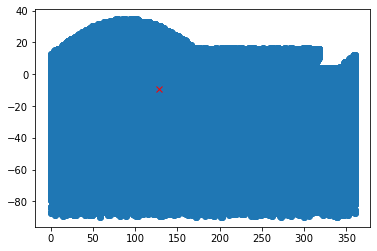

In [18]:
# Euclid pointings
euclid_pointings=[(232.206456, 30.240056),
 (231.812144, 31.196085),
 (231.466027, 30.48791),
 (231.124964, 29.778823)]

ra=[]
dec=[]
for index, euc_pointing in enumerate(euclid_pointings):
    ra.append(euc_pointing[0])
    dec.append(euc_pointing[1])    
print(np.mean(ra))

plt.plot(data['fieldRA'],data['fieldDec'], 'o')
plt.plot(360-np.mean(ra),np.mean(dec)-40 , 'rx')

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5.90633443e-04, 1.80058709e+00, 3.60058354e+00, 5.40057999e+00,
        7.20057645e+00, 9.00057290e+00, 1.08005694e+01, 1.26005658e+01,
        1.44005623e+01, 1.62005587e+01, 1.80005552e+01, 1.98005516e+01,
        2.16005481e+01, 2.34005445e+01, 2.52005410e+01, 2.70005374e+01,
        2.88005339e+01, 3.06005303e+01, 3.24005268e+01, 3.42005233e+01,
        3.60005197e+01, 3.78005162e+01, 3.96005126e+01, 4.14005091e+01,
        4.32005055e+01, 4.50005020e+01, 4.68004984e+01, 4.86004949e+01,
        5.04004913e+01, 5.22004878e+01, 5.40004842e+01, 5.58004807e+01,
        5.76004771e+01, 5.94004736e+01, 6.12004701e+01, 6.30004665e+01,
        6.48004630e+01, 6.66004594e+01, 6.84004559e+01, 7.02004523e+01,
        7.20004488e+01, 7.38004

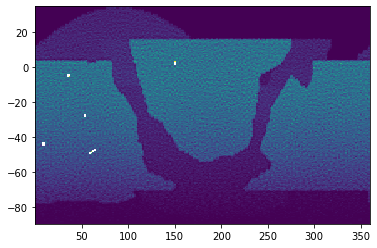

In [19]:
plt.hist2d(data['fieldRA'],data['fieldDec'],bins=200,cmin=0,cmax=400)

In [22]:
#LSST FoV polygon
# Opening JSON file
lsst_filename='lsst_polygon.json'

def read_focal_plane(filename):
    with open(filename) as f:
        vertices = json.load(f)
    polygon = np.array(vertices)
    return polygon

lsst_fov=read_focal_plane(lsst_filename)
focalplane = skycoverage.close_polygon(lsst_fov)

In [23]:
# Draw Euclid box
import skycoverage

def meas_euclid_box(ctrRA,ctrDec,widthRA):
    hwidth = widthRA/2.0
    minRa = ctrRA + hwidth/np.cos((abs(ctrDec)+hwidth)*np.pi/180.0)
    maxRa = ctrRA - hwidth/np.cos((abs(ctrDec)+hwidth)*np.pi/180.0)
    
    return minRa, maxRa


In [24]:
tol=3
ra=40
dec=-20
euc_box_minRa, euc_box_maxRa = meas_euclid_box(np.mean(ra), np.mean(dec), 0.75)
euc_box_minDec = np.mean(dec) - 0.75/2. - tol
euc_box_maxDec = np.mean(dec) + 0.75/2. + tol
ra_width= euc_box_minRa - euc_box_maxRa
print(ra_width)
print(euc_box_minRa, euc_box_maxRa)
print(euc_box_minDec, euc_box_maxDec)
euc_ra = [euc_box_minRa+tol/2., euc_box_maxRa-tol/2.]
euc_dec = [euc_box_minDec, euc_box_maxDec]
print(euc_ra)
print(euc_dec)

0.8000563295023397
40.40002816475117 39.59997183524883
-22.175 -17.825
[41.30002816475117, 38.69997183524883]
[-22.175, -17.825]


# Select Rubin data within boundaries of Euclid focalplane

In [138]:
rubin_ptgs_df = data[(data['fieldRA'] < euc_ra[0]) & (data['fieldRA'] > euc_ra[1])
                    & (data['fieldDec'] > euc_dec[0]) & (data['fieldDec'] < euc_dec[1])]

<AxesSubplot:>

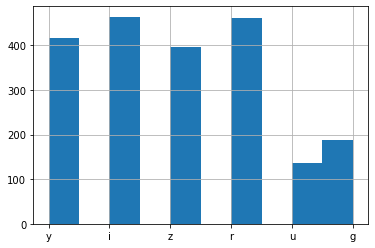

In [139]:
rubin_ptgs_df['filter'].hist()

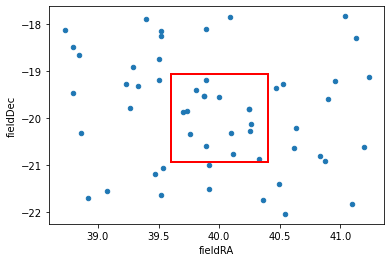

In [27]:
#rubin_ptgs_df.groupby('filter').plot(kind='scatter', x='fieldRA', y='fieldDec')
#rubin_ptgs_df.loc([rubin_ptgs_df.filter==cond['a'],['fieldRA', 'fieldDec']]).plot(kind='scatter', x='fieldRA', y='fieldDec'.format(**cond))
df_u = rubin_ptgs_df.loc[rubin_ptgs_df['filter']=='u']
df_u.plot(kind='scatter', x='fieldRA', y='fieldDec')
plt.gca().add_patch(Rectangle((ra-ra_width/2.,dec-1.875/2.),ra_width,1.875,
                    angle=0,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))

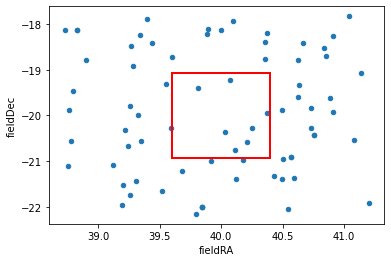

In [28]:
#rubin_ptgs_df.groupby('filter').plot(kind='scatter', x='fieldRA', y='fieldDec')
#rubin_ptgs_df.loc([rubin_ptgs_df.filter==cond['a'],['fieldRA', 'fieldDec']]).plot(kind='scatter', x='fieldRA', y='fieldDec'.format(**cond))
df_g = rubin_ptgs_df.loc[rubin_ptgs_df['filter']=='g']
df_g.plot(kind='scatter', x='fieldRA', y='fieldDec')
plt.gca().add_patch(Rectangle((ra-ra_width/2.,dec-1.875/2.),ra_width,1.875,
                    angle=0,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))

u
Number of layers 70 >= 15
96.31966448781336 -32.145 2.639328975626711


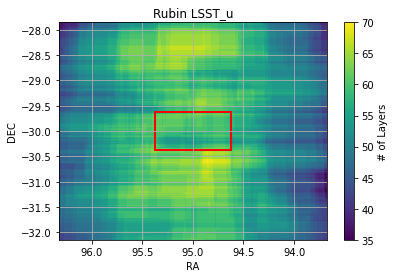

g
Number of layers 93 >= 10
96.31966448781336 -32.145 2.639328975626711


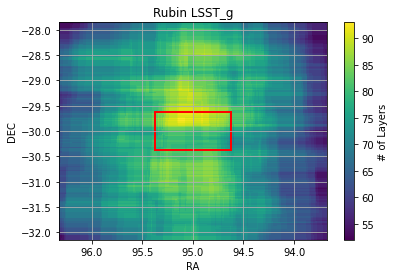

r
Number of layers 228 >= 10
96.31966448781336 -32.145 2.639328975626711


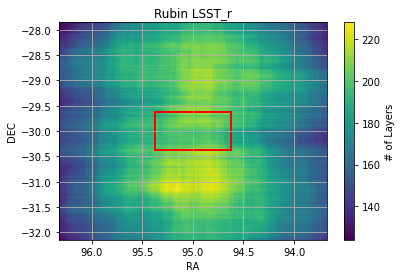

i
Number of layers 228 >= 10
96.31966448781336 -32.145 2.639328975626711


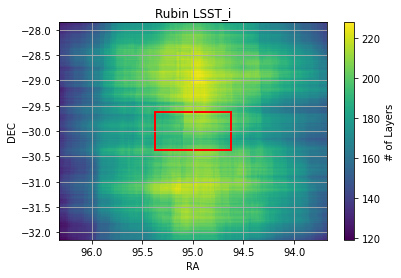

z
Number of layers 195 >= 15
96.31966448781336 -32.145 2.639328975626711


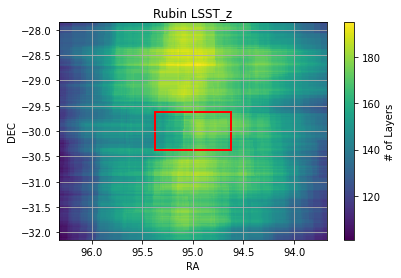

In [142]:
from layers import get_layers

tol=1.77
ra=95
dec=-30.
euc_box_minRa, euc_box_maxRa = meas_euclid_box(ra,dec,0.75)
euc_box_minDec = dec - 0.75/2. - tol
euc_box_maxDec = dec + 0.75/2. + tol

euc_ra = [euc_box_minRa+tol/2., euc_box_maxRa-tol/2.]
euc_dec = [euc_box_minDec, euc_box_maxDec]

xmin, ymin, xmax, ymax = euc_ra[1], euc_dec[0], euc_ra[0], euc_dec[1]
ra_width= np.abs(euc_ra[1]-euc_ra[0])

xmin = xmin - 360 if xmin > 180 else xmin
xmax = xmax - 360 if xmax > 180 else xmax
extent = xmin, ymin, xmax, ymax

size = (401,701)
filters='ugriz'
layers = {'u':15,'g':10,'i':10,'r':10,'z':15}

for filter in filters:
    filtername=f'LSST_{filter}'
    print(filter)
    targets =[]
    for index, rows in rubin_ptgs_df[(rubin_ptgs_df['filter']==filter)].iterrows():
    # Create list for the current row
        my_list =[rows.fieldRA, rows.fieldDec]

        targets.append(my_list)
    
    X,Y, image = get_layers(extent,size,targets,focalplane)
  
    if np.max(image) <= layers[filter]-1:
        print('layer count {} < {}'.format(np.max(image),layers[filter]))
       # break
    else:
       # print(f'ObsId {obsId}')
        print('Number of layers {} >= {}'.format(np.max(image),layers[filter]))
    
    plot_layers(X,Y,image,euc_ra[0],euc_dec[0],ra_width,filter_name=filtername)

In [29]:
from astropy.coordinates import SkyCoord

In [30]:
from astropy.coordinates import Angle
ang= Angle('0d5m0.0s')
print(ang)
print(Angle('0.5d'))

0d05m00s
0d30m00s


In [31]:
c = SkyCoord([10, 10], [-30, -35], unit="deg")
d = SkyCoord(10, -35, unit="deg")
dist_pair = c.separation(d)


In [39]:
def apply_min_pair_separation(df,ang):
    drop_list = []
    df = df.reset_index()  # make sure indexes pair with number of rows
    for index, row in df.iterrows():
        target = SkyCoord(row['fieldRA'], row['fieldDec'], unit='deg')
        for i_pos in range(index+1, len(df)):
            neighbor = SkyCoord(df['fieldRA'].loc[i_pos], df['fieldDec'].loc[i_pos], unit='deg')
            dist = target.separation(neighbor)
            if dist < Angle(ang):
                #print(df_g['observationId'].loc[i_pos])
                drop_list.append(df['observationId'].loc[i_pos])
                
    df = df[~df.observationId.isin(drop_list)]
    return df

In [40]:
def drop_min_pair_separation(pt1,pt2,ang):
    print(pt1[0])
    target = SkyCoord(pt1[0],pt1[1], unit='deg')
    neighbor = SkyCoord(pt2[0],pt2[1], unit='deg')
    dist = target.separation(neighbor)
    if dist < Angle(ang):
        return target
    else:
        return target, neighbor

In [119]:
def select_rubin_targets_in_euc_fov(df, ra, dec):
    tol=1.8

    euc_box_minRa, euc_box_maxRa = meas_euclid_box(ra, dec, 0.75)
    euc_box_minDec = dec - 0.75/2. - tol
    euc_box_maxDec = dec + 0.75/2. + tol
    ra_width= euc_box_minRa - euc_box_maxRa

    euc_ra = [euc_box_minRa+tol/2., euc_box_maxRa-tol/2.]
    euc_dec = [euc_box_minDec, euc_box_maxDec]
       
    rubin_ptgs_df = df[(df['fieldRA'] < euc_ra[0]) & (df['fieldRA'] > euc_ra[1])
                    & (df['fieldDec'] > euc_dec[0]) & (df['fieldDec'] < euc_dec[1])]
    
    sub_df = rubin_ptgs_df.groupby('filter').apply(lambda x: apply_min_pair_separation(x,'0.5d') 
                                           if set(x['filter'].unique()).intersection(set(['g','r','i']))
                                                   else apply_min_pair_separation(x,'0.45d') )
    #sub_df = rubin_ptgs_df['filter'].apply(lambda x: apply_min_pair_separation(x,'0.5d') if set(x).intersection(set(['g','r','i'])) else apply_min_pair_separation(x,'0.43d') )

    return sub_df

In [94]:
test2_df = rubin_ptgs_df.groupby('filter')

In [81]:
sub_df = rubin_ptgs_df
S1= set(['g','r', 'i'])
S2 = set(sub_df['filter'].unique())
if S1.intersection(S2):
    print('True')
else:
    print('False')


sub_df['yes_filters'] = sub_df['filter'].apply(lambda x: True if set(x).intersection(set(['g','r','i'])) else False  )

True


<ipython-input-81-761dab913522>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['yes_filters'] = sub_df['filter'].apply(lambda x: True if set(x).intersection(set(['g','r','i'])) else False  )


In [120]:
test_df = select_rubin_targets_in_euc_fov(data,ra=95, dec=-30.)

In [121]:
filters='ugriz'
for filter in filters:
    print(filter, len(test_df[test_df['filter']==filter]))

u 20
g 13
r 16
i 14
z 19


[95.43566389023954, -31.079026581530268]
[94.27377523275084, -31.232034937989077]
[95.85501613680256, -28.89392941662368]
[94.23181516915311, -29.004541746708522]
[94.83863669899976, -31.994169835231396]
[95.01202780837465, -28.862472621778444]
[96.12898850623856, -31.076162149494355]
[94.1246792335609, -28.383697770514182]
[96.26071878689605, -30.414465659658823]
[94.16309730794848, -27.8406470384841]
[93.8443994222145, -30.72691582173789]
[95.47802992045516, -32.029271044565576]
[95.06341600028566, -29.55381795895469]
[94.81397984242302, -31.404699980872095]
[94.96864565554235, -27.835515988689366]
[93.66851841956314, -32.13501404819809]
[96.30413535730489, -28.674947089251507]
[95.1274376528637, -30.699562582830346]
[94.2559924615815, -30.42469706853183]
[93.70367639336168, -29.389462494829008]
Number of layers 16 >= 15
96.30966448781335 -32.125 2.6193289756267006


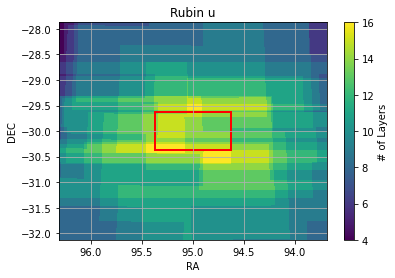

[95.43566389023954, -31.079026581530268]
[94.27377523275084, -31.232034937989077]
[95.47338240630656, -31.625380942890086]
[95.89279232271062, -28.523150678013938]
[94.40582853061186, -29.605437342724958]
[93.96259971446548, -30.234052407230468]
[94.44830083863077, -28.22371671066086]
[95.51908782818697, -27.99513289391076]
[95.47136487273328, -30.286592046332103]
[93.83704176487267, -32.035187522966424]
[96.20133616294792, -30.673523148683643]
[94.18372518091437, -29.09871871860841]
[95.49510472673578, -28.939367797228904]
Number of layers 11 >= 10
96.30966448781335 -32.125 2.6193289756267006


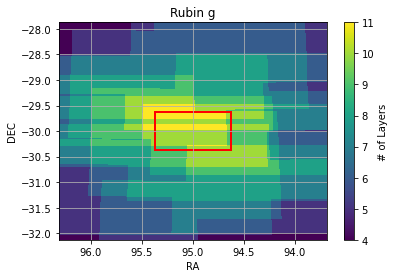

[94.63954575878027, -27.912450257224688]
[94.371393147331, -30.590589437738654]
[94.02242230866709, -29.089543549526997]
[95.51926319600112, -30.031433933801956]
[95.85501613680256, -28.89392941662368]
[94.40582853061186, -29.605437342724958]
[95.4396309167649, -28.173238851786138]
[94.83863669899976, -31.994169835231396]
[95.01202780837465, -28.862472621778444]
[96.12898850623856, -31.076162149494355]
[94.52270200796531, -31.296661992497892]
[95.17849904108921, -31.252765655183126]
[93.78363472865962, -31.892291673142303]
[96.26071878689605, -30.414465659658823]
[95.92034715193739, -31.62822382658591]
[93.66734181834437, -31.352453305232135]
Number of layers 14 >= 10
96.30966448781335 -32.125 2.6193289756267006


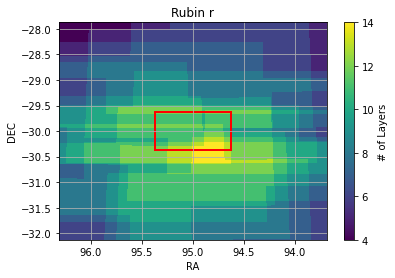

[94.2355661431409, -29.44473807149988]
[94.371393147331, -30.590589437738654]
[94.54252383034934, -30.06087212710508]
[95.51926319600112, -30.031433933801956]
[94.27377523275084, -31.232034937989077]
[94.53865197559256, -32.03351631622564]
[95.4396309167649, -28.173238851786138]
[96.26749957425274, -30.43869374180826]
[94.01727467576278, -28.06999314277554]
[94.92982263252802, -31.039373445011663]
[96.13593660956036, -31.59194378672635]
[95.29887192790466, -29.223333760730323]
[93.78363472865962, -31.892291673142303]
[96.15967504436279, -29.932435023582904]
Number of layers 12 >= 10
96.30966448781335 -32.125 2.6193289756267006


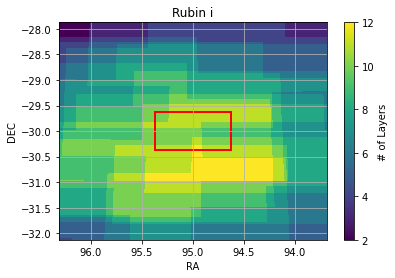

[94.2355661431409, -29.44473807149988]
[95.62535709156369, -29.130682515133216]
[94.54252383034934, -30.06087212710508]
[93.83896549895134, -30.19168462245998]
[96.26749957425274, -30.43869374180826]
[94.01727467576278, -28.06999314277554]
[94.92982263252802, -31.039373445011663]
[96.13593660956036, -31.59194378672635]
[94.60946253084732, -29.10928359393683]
[95.07738986570028, -32.10669927706658]
[93.90677413073843, -30.687815711016725]
[94.40010423609021, -28.533649499125293]
[93.89669077112218, -31.48523448029248]
[95.51369532941568, -28.316925393566617]
[96.15967504436279, -29.932435023582904]
[96.22464699123041, -27.8948809136252]
[94.58770516744097, -27.877498376587663]
[95.43059152761376, -30.678323653982318]
[95.45945203296448, -30.114586767199587]
Number of layers 16 >= 15
96.30966448781335 -32.125 2.6193289756267006


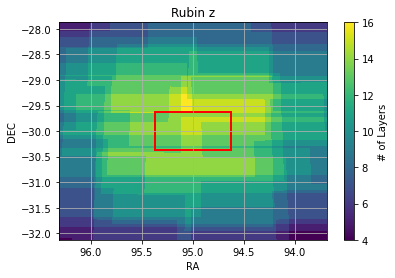

In [132]:
from layers import get_layers

tol=1.75
ra=95
dec=-30.
euc_box_minRa, euc_box_maxRa = meas_euclid_box(ra,dec,0.75)
euc_box_minDec = dec - 0.75/2. - tol
euc_box_maxDec = dec + 0.75/2. + tol
ra_width= euc_box_minRa - euc_box_maxRa

euc_ra = [euc_box_minRa+tol/2., euc_box_maxRa-tol/2.]
euc_dec = [euc_box_minDec, euc_box_maxDec]

xmin, ymin, xmax, ymax = euc_ra[1], euc_dec[0], euc_ra[0], euc_dec[1]
ra_width= np.abs(euc_ra[1]-euc_ra[0])
xmin = xmin - 360 if xmin > 180 else xmin
xmax = xmax - 360 if xmax > 180 else xmax
extent = xmin, ymin, xmax, ymax
size = (401,701)

filters = 'ugriz'
layers = {'u':15,'g':10,'i':10,'r':10,'z':15}
for filter in filters:
    targets = []
    for index, rows in test_df[test_df['filter']==filter].iterrows():
        # Create list for the current row
            my_list =[rows.fieldRA, rows.fieldDec]
            print(my_list)
            targets.append(my_list)
        
    X,Y, image = get_layers(extent,size,targets,focalplane)
  
    if np.max(image) <= layers[filter]-1:
        print('layer count {} < {}'.format(np.max(image),layers[filter]))
    else:
        print('Number of layers {} >= {}'.format(np.max(image),layers[filter]))
    
    plot_layers(X,Y,image,euc_ra[0],euc_dec[0],ra_width,filter_name=filter)

In [56]:
test_g = rubin_ptgs_df[rubin_ptgs_df['filter']=='g']

In [71]:
test = np.array((list(zip(test_g.fieldRA, test_g.fieldDec))))

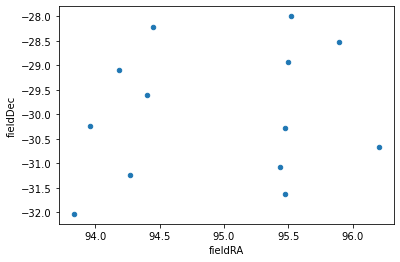

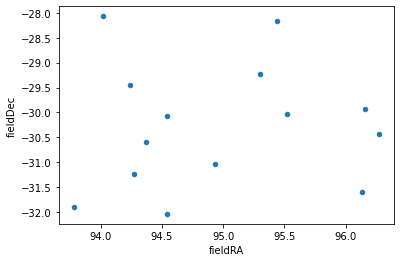

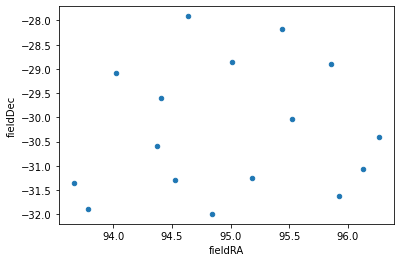

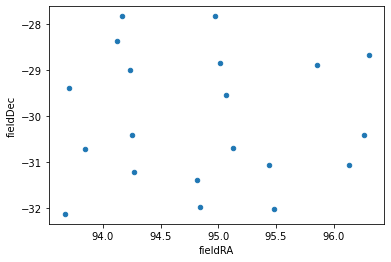

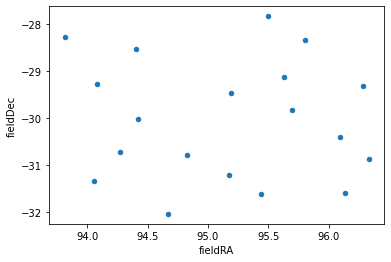

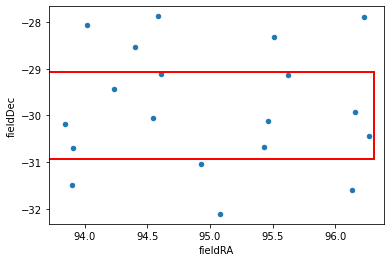

In [123]:
sub_samp = test_df

sub_samp.reset_index(drop = True, inplace = True)
sub_samp.groupby('filter').plot(kind='scatter', x='fieldRA', y='fieldDec')
plt.gca().add_patch(Rectangle((ra-ra_width/2.,dec-1.875/2.),ra_width,1.875,
                    angle=0,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))

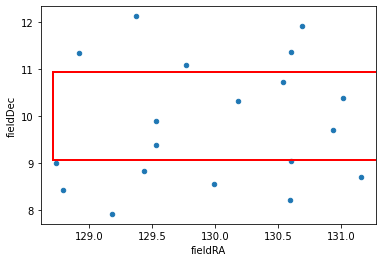

In [41]:
df_u.plot(kind='scatter', x='fieldRA', y='fieldDec')
plt.gca().add_patch(Rectangle((ra-ra_width/2.,dec-1.875/2.),ra_width,1.875,
                    angle=0,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))

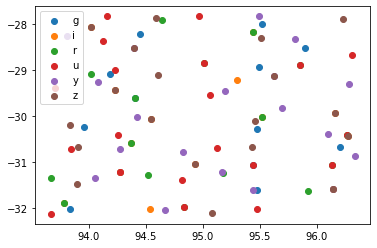

In [126]:
df = test_df

fig,ax = plt.subplots()
for k,d in df.groupby('filter'):
    ax.scatter(d['fieldRA'], d['fieldDec'], label=k)
plt.legend(loc=2)
#plt.savefig('scatter.png')
plt.show()

# Translate RA and DEC to "Pilot-Phase Pointing"

In [143]:
def differential_metric_scale(y0,y1):
    return np.abs(np.cos(np.deg2rad(y0)))/np.abs(np.cos(np.deg2rad(y1))) #1/np.cos(np.deg2rad(y1))  #np.abs(np.cos(y0))/np.abs(np.cos(y1))

def metric_scale(y):
	return 1/np.abs(np.cos(np.deg2rad(y)))

def to_tangent_plane(p):
	return [p[0] / metric_scale(p[1]), p[1]]

def move(euclid_target0,pointings0,dx,dy):
    
    vector = [dx,dy]
    
    barycenter0 = euclid_target0 #compute_barycenter(pointings0)
    barycenter1 = np.array(barycenter0) + np.array(vector)

    relative_pointings = pointings0 - barycenter0
   # relative_pointings = [to_tangent_plane(p) for p in relative_pointings]
    
    pointings1 = []
    for p in relative_pointings:
        y0 = barycenter0[1]
        y1 = barycenter1[1]
     #   print(y0,y1)
        p1 = [barycenter1[0] + p[0] * differential_metric_scale(y0,y1), 
              barycenter1[1] + p[1]]
        pointings1.append(p1)
  
    return pointings1

<Figure size 432x288 with 0 Axes>

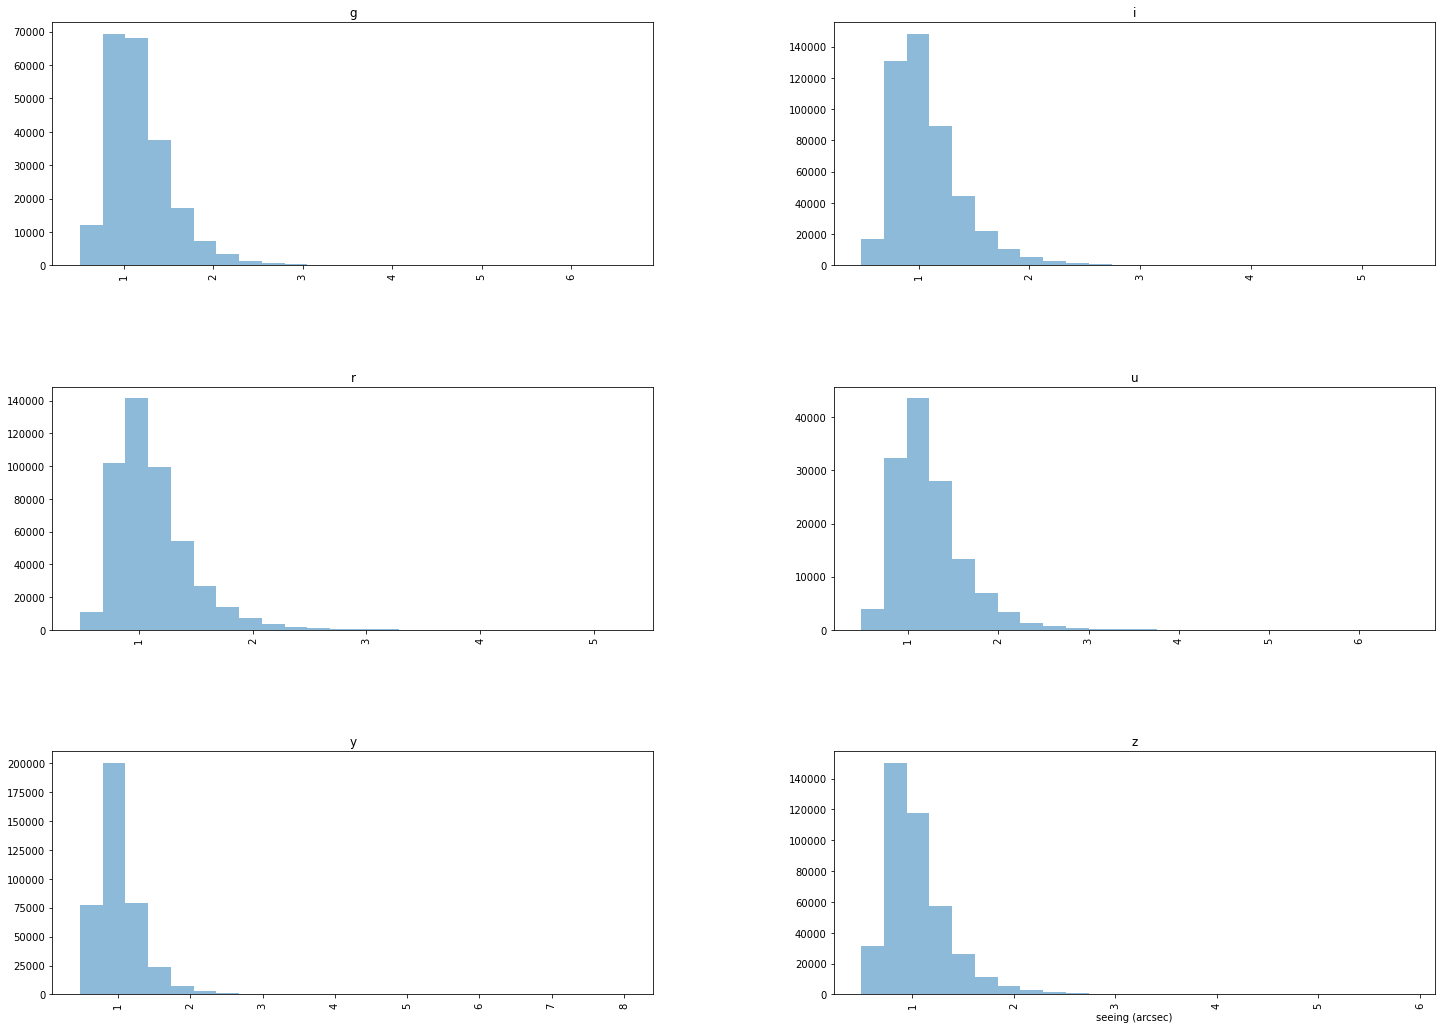

<Figure size 432x288 with 0 Axes>

In [176]:
data['seeingFwhmEff'].hist(by=data['filter'], bins=24, alpha=0.5,figsize=(24, 18))
plt.xlabel('seeing (arcsec)')
plt.figure()

In [16]:
# Euclid pointings

euclid_pointings=[(232.206456, 30.240056),
 (231.812144, 31.196085),
 (231.466027, 30.48791),
 (231.124964, 29.778823)]

In [17]:
import healpy as hp

In [22]:
import lsst.sims.maf.db as db

ModuleNotFoundError: No module named 'lsst'

## Evaluate layering per band
### - Need size of Rubin focal plane in sky coordinates
### - Construct grid and increase pixel count for each Rubin focal plane that intersects pixel

In [20]:
focalplane

array([[-1.05833333, -1.05833333],
       [-1.76388889, -1.05833333],
       [-1.76388889,  1.05833333],
       [-1.05833333,  1.05833333],
       [-1.05833333,  1.76388889],
       [ 1.05833333,  1.76388889],
       [ 1.05833333,  1.05833333],
       [ 1.76388889,  1.05833333],
       [ 1.76388889, -1.05833333],
       [ 1.05833333, -1.05833333],
       [ 1.05833333, -1.76388889],
       [-1.05833333, -1.76388889],
       [-1.05833333, -1.05833333]])

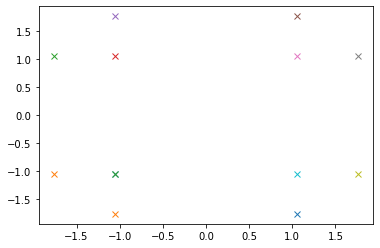

In [21]:
focalplane[0]
for pt in focalplane:
    plt.plot(pt[0],pt[1], 'x')

## Calculate the Zeropoints per Visit

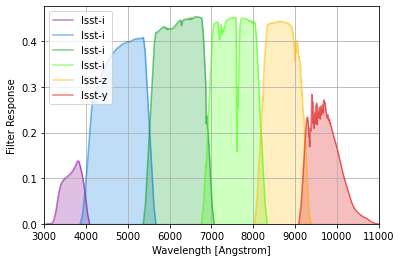

In [19]:
from speclite.filters import load_filter, ab_reference_flux
import speclite
lsst = speclite.filters.load_filters('lsst2019-*')

speclite.filters.plot_filters(
    lsst, wavelength_limits=(3000, 11000), legend_loc='upper left')

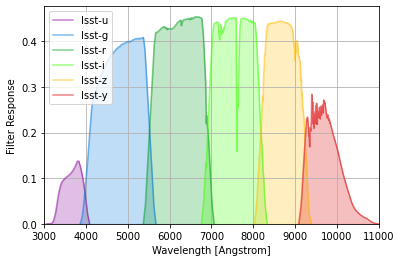

In [20]:
lsst2 = speclite.filters.load_filters('lsst2016-*')

speclite.filters.plot_filters(
    lsst2, wavelength_limits=(3000, 11000), legend_loc='upper left')

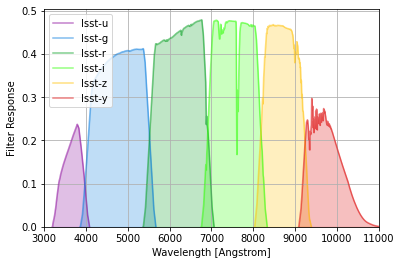

In [24]:
lsst2 = speclite.filters.load_filters('lsst2021-*')

speclite.filters.plot_filters(
    lsst2, wavelength_limits=(3000, 11000), legend_loc='upper left')

In [36]:
from speclite.filters import load_filter, ab_reference_flux
from astropy import units as u

def calculate_zero_point(band_name, B0=24):
    filt = load_filter(band_name)
    return (filt.convolve_with_function(ab_reference_flux) *
            10 ** (-0.4 * B0)).to(1 / (u.s * u.m**2))

In [77]:
lss2019_zp={}
lss2016_zp={}
lss2021_zp={}
filters='ugrizy'
eff_area= 32.4
for filter in filters:
    lss2019_zp[filter]=eff_area*calculate_zero_point('lsst2019-{}'.format(filter))
    lss2016_zp[filter]=eff_area*calculate_zero_point('lsst2016-{}'.format(filter))
    lss2021_zp[filter]=eff_area*calculate_zero_point('lsst2021-{}'.format(filter))
    
                              

In [78]:
for filter in filters:
    print(filter, round(lss2016_zp[filter].value,2), round(lss2019_zp[filter].value,2), round(lss2021_zp[filter].value,2))

u 9.16 9.16 14.87
g 50.7 50.7 54.38
r 43.7 43.7 44.91
i 32.36 32.36 34.4
z 22.68 22.68 23.96
y 10.58 10.58 11.57


In [85]:
WLD2016_zeropoints = np.array([9.16, 50.7, 43.7, 32.36, 22.68, 10.58])
WLD2021_zeropoints = np.array([14.87, 54.38, 44.91, 34.4, 23.96, 11.57])

zp2016 = 2.5*np.log10(WLD2016_zeropoints*10**(-0.4*(0-24)))
zp2021 = 2.5*np.log10(WLD2021_zeropoints*10**(-0.4*(0-24)))

for i in range(6):
    params[f'zenith_fwhm_{bands[i]}']=fwhm_list[i]
    params[f'central_wavelength_{bands[i]}']=central_wavelength[i]
    params[f'sky_brightness_{bands[i]}']=sky_brightness[i]
    params[f'zero_point2016_{bands[i]}'] = zp2016[i]
    params[f'zero_point2021_{bands[i]}'] = zp2021[i]
   
    print(bands[i], round(params[f'zero_point2016_{bands[i]}'],5), round(params[f'zero_point2021_{bands[i]}'],5))

u 26.40474 26.93078
g 28.26252 28.3386
r 28.1012 28.13086
i 27.77502 27.8414
z 27.38911 27.44872
y 26.56121 26.65833


In [23]:
lsst?

Type:        FilterSequence
String form: <speclite.filters.FilterSequence object at 0x16aeabd60>
Length:      6
File:        /usr/local/lib/python3.9/site-packages/speclite/filters.py
Docstring:  
Immutable sequence of filter responses.

Sequences should normally be created by calling :func:`load_filters`.
Objects implement the `immutable sequence
<https://docs.python.org/2/library/collections.html
#collections-abstract-base-classes>`__ API, in addition to the methods
listed here.

A filter sequence's :meth:`get_ab_maggies` and :meth:`get_ab_magnitudes`
methods return their results in a :class:`Table <astropy.table.Table>` and
are convenient for calculating convolutions in several bands for
multiple spectra.  For example, given the following 4 (identical) spectra
covering the SDSS filters:

>>> num_spectra, num_pixels = 4, 500
>>> wlen = np.linspace(2000, 12000, num_pixels) * default_wavelength_unit
>>> flux = np.ones((num_spectra, num_pixels)) * 1e-17 * default_flux_unit

We can now c

In [ ]:
# LOAD throughputs v14 and v1.7
#from astropy.io import ascii
#filters = 'ugrizy'
#lsst2021={}
#t={}
#for filter in filters:
#    lsst2021[filter]='/Users/jenniferpollack/Projects/OU-SIM/throughput-curves/v1.7/lsst_{}_v1.7.dat'.format(filter)
#    t[filter] = ascii.read(lsst2021[filter])

In [22]:
#for filter in filters:
#t[filter].write('lsst2021-{}.ecsv'.format(filter))
#t_r.write('lsstv1p4-r.ecsv')

In [50]:
import galsim
# Values from Ivezic et al 2019
params = dict()
bands = ['u', 'g', 'r', 'i', 'z', 'y']
fwhm_list = [0.81, 0.77, 0.73, 0.71, 0.69, 0.68]
sky_brightness = [22.99, 22.26, 21.20, 20.48, 19.60, 18.61]
ext = [0.491, 0.213, 0.126, 0.096, 0.069, 0.170]
central_wavelength = [3592.13, 4789.98, 6199.52, 7528.51, 8689.83, 9674.05]
WLD_zeropoints = np.array([9.16, 50.70, 43.70, 32.36, 22.68, 10.58]) # Values from WLD using lsst-throughputs
zp = 2.5*np.log10(WLD_zeropoints*10**(-0.4*(0-24)))
for i in range(6):
    params[f'zenith_fwhm_{bands[i]}']=fwhm_list[i]
    params[f'central_wavelength_{bands[i]}']=central_wavelength[i]
    params[f'sky_brightness_{bands[i]}']=sky_brightness[i]
    params[f'zero_point_{bands[i]}'] = zp[i]
params['mirror_diameter']=8.36
params['effective_area']=32.4
params['pixel_scale']=0.2
params['X']=1.2
def get_psf(band, params=params):
    zenith_fwhm = params[f'zenith_fwhm_{band}']
    central_wavelength = params[f'central_wavelength_{band}']
    mirror_diameter = params['mirror_diameter']
    effective_area = params['effective_area']
    px_scale = params['pixel_scale']
    sky_brightness = params[f'sky_brightness_{band}']
    X = params['X']
    atmospheric_psf_fwhm = zenith_fwhm*X**0.6 # Expected FWHM for the atmospheric PSF given the airmass
    atmospheric_psf_model = galsim.Kolmogorov(fwhm = atmospheric_psf_fwhm) # Atmospheric part
    # Set up the optical part
    lambda_over_diameter = 3600*math.degrees(1e-10*central_wavelength/mirror_diameter) # This is tells you the diffraction limit
    area_ratio = effective_area/(math.pi*(0.5*mirror_diameter)**2) 
    obscuration_fraction = math.sqrt(1 - area_ratio) # Part of the mirror is obscured due to the presence of the secondary (that blocks light)
    optical_psf_model = galsim.Airy(lam_over_diam = lambda_over_diameter, obscuration = obscuration_fraction) # Optics part of the PSF
    psf_model = galsim.Convolve(atmospheric_psf_model,optical_psf_model) # total PSF
    return psf_model
def get_flux(mag, band, exposure_time, gain=1.0):
    #Given a magnitude and a zeropoint with exposure time, convert to flux counts
    #the gain can also be specified in GalSim when drawing the profiles
    return 10**(-0.4*(mag-params[f'zero_point_{band}']))*exposure_time*gain

In [21]:
for i in range(6):
    print(bands[i], params[f'zero_point_{bands[i]}'])

u 26.40473868416963
g 28.262519898333345
r 28.10120359242606
i 27.775021282350593
z 27.389107625552178
y 26.561214169247922
